Será que é possível estudar para o vestibular e ainda aprender Python? Sim, claro! E é esse um dos objetivos da série *ENEM Tecnológico* aqui do site. Nessa série, utilizaremos ferramentas computacionais para analisar e expandir questões do ENEM.

No artigo de hoje, analisaremos uma questão da prova de 2019. E, de quebra, aprenderemos a fazer gráficos 3D e 4D(?!) com Matplotlib.

O arquivo Jupyter Notebook com todo o código desse artigo se encontra [nesse link](https://github.com/Ciencia-Programada/enem-tecnologico).

## O enunciado

Abaixo o enunciado da questão, retirado da prova amarela regular aplicada em 2019:

![enunciado](enunciado_amarela_regular_107_tijolo.png)

Claramente é uma questão centrada na disciplina de Física. Vamos avaliar os tópicos da disciplina envolvidos:

- queda livre de um tijolo
- impulso

## A física da questão

Não é de hoje que alguns enunciados do ENEM deixam a desejar no que diz respeito à clareza das informações. Por exemplo, não há informação sobre o tipo de colisão (elástica ou inelástica?), a velocidade final da colisão (temos que considerar 0 m/s, mas é meio irreal considerar que para abruptamente), o que é considerado a força impulsiva média (a resultante das forças ou a força que atua no sentido contrário ao da queda no momento do choque?) e a falta de precisão do "pode durar" no trecho *o impacto pode durar até 0,5 s*. Mas vamos modelar a questão com o que é possível.

Considerando a conservação de energia mecânica, onde a energia cinética final é igual a energia potencial inicial, temos:

$$
\frac{m v^2}{2} = mgh \therefore v = \sqrt{2gh}
$$

De onde tiramos a velocidade do tijolo no momento imediatamente antes do impacto.

Do Teorema do Impulso:

$$
I = \Delta Q \\
F_m \cdot \Delta t = m \cdot \Delta v \therefore F_m = \frac{m \cdot \Delta v}{\Delta t}
$$

onde *I* é impulso, *Q* é momento linear e *F<sub>m</sub>* é a força média do impacto.

Como a questão quer a resposta em função da força peso do tijolo, sendo *N* o número de tijolos e *P* o peso de um tijolo, o que se pergunta é:

$$
N = \frac{F_m}{P}
$$

Observe que, como a massa do tijolo faz parte tanto da força média quanto da força peso, na realidade estamos calculando, também, a razão entre a (des)aceleração do tijolo e a aceleração da gravidade. Vamos voltar a esse ponto mais adiante.

## Resolvendo com Python

Vamos começar importando as bibliotecas necessárias. Como queremos trabalhar com as unidades, usaremos a biblioteca [pint](https://cienciaprogramada.com.br/2020/09/python-unidades-cerveja-pint/) já famosa aqui no site. Para a parte matemática, podemos usar a biblioteca [`math`](https://docs.python.org/3/library/math.html) que faz parte da instalação padrão do Python. No entanto, como vamos construir gráficos mais adiante para expandir mais a questão variando valores, vamos usar o [NumPy](https://numpy.org/).

In [1]:
import pint
import numpy as np

As linhas a seguir criam um registro de unidades, um criador de quantidades e já configuram a biblioteca para ser usada em futuros gráficos com Matplotlib.

In [2]:
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
ureg.setup_matplotlib(True)

Vamos agora associar os valores do enunciado a variáveis:

In [3]:
ACELERACAO_GRAVIDADE = Q_('10 m/s^2')

In [4]:
massa_tijolo = Q_('2.5 kg')
altura_queda_tijolo = Q_('5 m')
tempo_impacto_tijolo_capacete = Q_('0.5 s')

A grande vantagem de se usar programação é poder encapsular contas repetitivas em funções. Assim, vamos definir funções para as relações físicas que descobrimos anteriormente:

In [5]:
def forca_peso(massa):
    return massa * ACELERACAO_GRAVIDADE

In [6]:
def velocidade_queda_livre(altura_queda):
    return np.sqrt(2 * ACELERACAO_GRAVIDADE * altura_queda)

In [7]:
def variacao_momento_linear(massa, variacao_velocidade):
    return massa * variacao_velocidade

In [8]:
def forca_impulsiva_media(massa, altura_queda, tempo_impacto):
    return variacao_momento_linear(massa, velocidade_queda_livre(altura_queda)) / tempo_impacto

Com essas funções e as variáveis criadas anteriormente, podemos calcular a força média do impacto:

In [9]:
forca_impulsiva_media(massa_tijolo, altura_queda_tijolo, tempo_impacto_tijolo_capacete)

50.0 <Unit('kilogram * meter / second ** 2')>

A unidade *kg m/s<sup>2</sup>* é equivalente a Newton (massa vezes aceleração, certo?). Verificando com a conversão interna do `pint`:

In [10]:
forca_impulsiva_media(massa_tijolo, altura_queda_tijolo, tempo_impacto_tijolo_capacete).to('N')

50.0 <Unit('newton')>

Repare que passamos apenas os dados do enunciado para a função `forca_impulsiva_media`. A função internamente chama as demais funções. Essa linha de raciocínio é fundamental em programação: crie funções especializadas e aproveite a ideia de composição. Quem já tem mais experiência em programação pode inclusive enxergar classes aqui, mas vou deixar isso para outro artigo.

Vamos agora criar a função que responde a questão. Essa função precisa dividir a força impulsiva média pela força peso. Logo, podemos aproveitar funções já criadas e passar apenas os dados do enunciado para a função:

In [11]:
def forca_g_impacto(massa, altura_queda, tempo_impacto):
    return forca_impulsiva_media(massa, altura_queda, tempo_impacto) / forca_peso(massa)

In [12]:
forca_g_impacto(massa_tijolo, altura_queda_tijolo, tempo_impacto_tijolo_capacete)

2.0 <Unit('dimensionless')>

Como é uma razão de forças, o resultado é adimensional (*dimensionless*) e a resposta é (aparentemente, conforme veremos adiante) a da letra A da questão. Mas calma, ainda não acabou. Você viu o nome que dei para essa função?

## Força g do impacto

Conforme escrito anteriormente no artigo, como a resposta é uma razão de forças sobre um mesmo corpo, acaba sendo também a razão entre a aceleração do corpo e a aceleração da gravidade. Vejamos:

In [13]:
desaceleracao_tijolo = velocidade_queda_livre(altura_queda_tijolo) / tempo_impacto_tijolo_capacete
desaceleracao_tijolo

20.0 <Unit('meter / second ** 2')>

In [14]:
desaceleracao_tijolo / ACELERACAO_GRAVIDADE

2.0 <Unit('dimensionless')>

As contas estão em módulo.

A chamada **força g** é uma medida de força por unidade de massa, uma aceleração portanto, que causa a percepção de peso. A força g experimentada por um objeto é devido ao vetor soma de todas as forças não gravitacionais e não eletromagnéticas atuando no objeto livre para se mover.

No caso em questão, vemos que o valor é de 2g, sendo *g* a aceleração da gravidade, daí o valor de 20 m/s<sup>2</sup>.

O termo *força* nesse caso é infeliz pois trata-se de uma medida de aceleração, mas o termo é tão popular que vamos utilizar aqui também.

Quem acompanha automobilismo já deve ter visto figuras como a abaixo, indicando a força g sobre um piloto em determinado ponto de um circuito.

[![f1_hamilton](f1.jpg)](https://youtu.be/zJRh9FG83d0)

Na figura, temos Hamilton pilotando uma Mercedes em 2017 no circuito da Austrália. Vemos que na curva 1 do circuito ele foi submetido a 6,5g. A volta completa pode ser vista clicando na imagem, abrirá um vídeo que mostra a força g durante toda a volta.

Achou pouco? Que tal uma corrida que foi cancelada pelas elevadas acelerações a que os pilotos estavam submetidos? Foi o que ocorreu no oval do Texas em 2001. Após ouvir queixas de fortes náuseas e tonturas por parte de todos os pilotos que participaram dos treinos, os médicos concluíram que a inclinação das curvas submetia os atletas a uma força de aproximadamente 5,5g em 18 dos 22 segundos necessários para completar uma volta - 3g por longos períodos é considerada o limite para preservar a saúde de um piloto nas provas. O vídeo abaixo é da cobertura da prova feita na época pela ESPN (clique na imagem para abrir o vídeo):

[![oval cancelado](https://img.youtube.com/vi/wVyfgh3TVCM/0.jpg)](https://www.youtube.com/watch?v=wVyfgh3TVCM)


Os dois vídeos a seguir mostram o que ocorre com uma pessoa submetida a esse nível de aceleração durante um certo tempo:

[![g1](https://img.youtube.com/vi/DMKcO-T5Y4o/0.jpg)](https://www.youtube.com/watch?v=DMKcO-T5Y4o)

[![g2](https://img.youtube.com/vi/iWY3-1gOrxk/0.jpg)](https://www.youtube.com/watch?v=iWY3-1gOrxk)

Não à toa que pilotos como o Barrichello afirmam que o pescoço é uma das regiões mais exigidas em provas, já que a cabeça é empurrada todo o tempo e precisa aguentar esse nível de aceleração.

Esse valor é impressionante, mas nem se compara aos valores que podem ser atingidos em acidentes. Inclusive, tendo em vista a segurança dos carros de corrida atuais, o maior risco em acidentes é a desaceleração repentina que pode ocorrer já que o piloto pode sofrer lesões internas ou desmaiar. Não por acaso vemos carros despedaçarem nos acidentes. É uma forma de tentar dissipar o máximo de energia sem causar uma parada brusca. Temos também [muros deformáveis](https://en.wikipedia.org/wiki/SAFER_barrier) e diversas outras tecnologias para tentar minimizar o efeito de desacelerações bruscas em acidentes.

Ainda assim, a força g a que se pode chegar em curtos intervalos de tempo é muito alta. No recente espetacular acidente de Grosjean mostrado no vídeo abaixo, estima-se que o impacto foi da ordem de 50g. Perceba que o carro partiu em dois e houve um incêndio. Felizmente o piloto não desacordou mesmo com a incrível desaceleração e sofreu apenas queimaduras leves nas mãos e pés.

[![grosjean](https://img.youtube.com/vi/ZQ7_En2xEm4/0.jpg)](https://www.youtube.com/watch?v=ZQ7_En2xEm4)

Para terminar essa tangente automobilística, veja o vídeo a seguir do acidente de Kenny Brack em 2003. O impacto foi da ordem de 210g. O piloto sofreu diversas lesões, que ele mesmo descreve no vídeo. Ele conseguiu voltar a correr em 2005, após 18 meses de recuperação.

[![brack](https://img.youtube.com/vi/Hy8fgGiI1WA/0.jpg)](https://www.youtube.com/watch?v=Hy8fgGiI1WA)

## Eu quero ibagens! Gráficos e interatividade

Se deixar fico falando de corrida aqui pra sempre... Vamos agora explorar um pouco mais a física do assunto. Vamos criar uma série de valores de altura, de massa e de tempo de impacto, usando o método `linspace` do NumPy.

In [15]:
altura = np.linspace(0.01, 20, 50) * ureg('m')
massa = np.linspace(0.01, 10, 50) * ureg('kg')
tempo_impacto = np.linspace(0.01, 0.5, 50) * ureg('s')

E importar a biblioteca Matplotlib para os gráficos.

In [16]:
import matplotlib.pyplot as plt

Para gráficos simples, como por exemplo, a variação da velocidade de queda com a altura da queda, basta o comando:

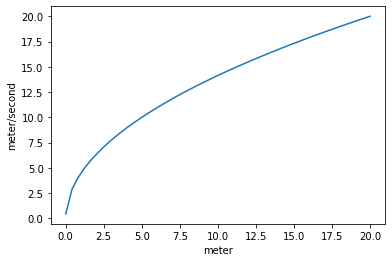

In [17]:
plt.plot(altura, velocidade_queda_livre(altura))

Mas o gráfico pode ser bem mais expressivo, conforme [já mostrei aqui no site](https://cienciaprogramada.com.br/2020/09/graficos-python-pint-matplotlib/). Vamos definir uma função com personalizações no gráfico.

In [18]:
def _plot_params(ax=None):
        """Parâmetros personalizados para gráficos.

        Parâmetros:
        ----------
        ax : Matplotlib axes, opcional, eixos onde o gráfico será plotado, padrão None
            
        Retorno:
        --------
        Matplotlib axes, eixo para uma figura
        """
        
        linewidth = 2
        size = 12

        # grid e ticks
        ax.minorticks_on()
        ax.grid(b=True, which='major', linestyle='--',
                linewidth=linewidth - 0.5)
        ax.grid(b=True, which='minor', axis='both',
                linestyle=':', linewidth=linewidth - 1)
        ax.tick_params(which='both', labelsize=size+2)
        ax.tick_params(which='major', length=6, axis='both')
        ax.tick_params(which='minor', length=3, axis='both')

        # nome dos eixos
        ax.xaxis.label.set_size(size+4)
        ax.yaxis.label.set_size(size+4)

        return ax

Vamos criar uma figura e um eixo associado:

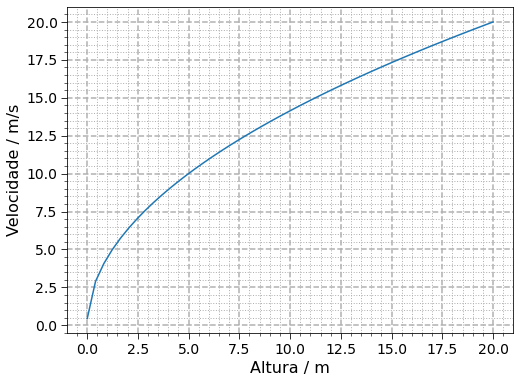

In [19]:
fig1, ax1 = plt.subplots(figsize=(8, 6), facecolor=(1,1,1))

_plot_params(ax1)
ax1.plot(altura, velocidade_queda_livre(altura))
ax1.set_xlabel("Altura" + " / " + f"{altura.units:~P}")
ax1.set_ylabel("Velocidade" + " / " + f"{velocidade_queda_livre(altura).units:~P}")
plt.show()

Agora sim temos um gráfico informativo.

Podemos também gerar gráficos para a força impulsiva média e a força g com os dados do enunciado.

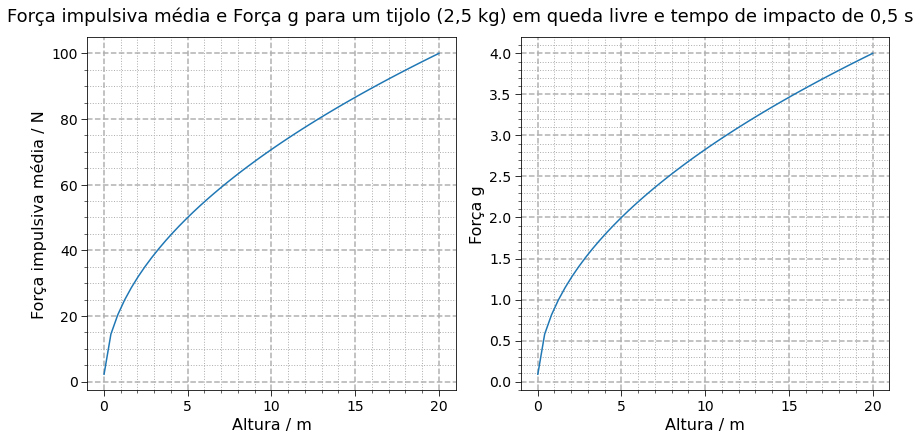

In [20]:
fig2, axarr = plt.subplots(ncols=2, nrows=1, facecolor=(1,1,1), figsize=(12, 6), constrained_layout=True)

for ax in axarr:
    _plot_params(ax)
    
axarr[0].plot(altura, forca_impulsiva_media(massa_tijolo, altura, tempo_impacto_tijolo_capacete))
axarr[0].set_xlabel("Altura" + " / " + f"{altura.units:~P}")
axarr[0].set_ylabel("Força impulsiva média" + " / " + f"{forca_impulsiva_media(massa_tijolo, altura, tempo_impacto_tijolo_capacete).to('N').units:~P}")

axarr[1].plot(altura, forca_g_impacto(massa_tijolo, altura, tempo_impacto_tijolo_capacete))
axarr[1].set_xlabel("Altura" + " / " + f"{altura.units:~P}")
axarr[1].set_ylabel("Força g")

fig2.suptitle("Força impulsiva média e Força g para um tijolo (2,5 kg) em queda livre e tempo de impacto de 0,5 s",
             fontsize=18)
plt.show()

Agora, pare e pense: tanto a força impulsive quanto a força g dependem da massa, da altura e do tempo de impacto. Podemos fazer gráficos em três dimensões. Na realidade, até 4 dimensões.

## Gráficos em 3D e em 4D(?!)

Vamos começar verificando como a força g varia em função da massa e da altura. Precisamos de um conjunto de pontos em duas dimensões sobre as quais uma terceira será construída. Daí o método [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) no NumPy:

In [21]:
Massa, Altura = np.meshgrid(massa, altura)

Como o retorno são matrizes, as variáveis estão nomeadas com letras maiúsculas, um costume da área científica.

Calculando a força g resultante, considerando ainda o tempo de impacto dado no enunciado:

In [22]:
Forca_g = forca_g_impacto(Massa, Altura, tempo_impacto_tijolo_capacete)

Agora, vamos criar uma superfície com os valores. Passando o parâmetro `subplot_kw` com a instrução para que se use uma projeção 3D nos subplots e usando o método `plot_surface` do eixo criado temos:

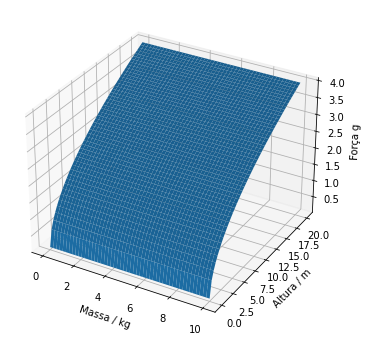

In [23]:
fig3, ax3 = plt.subplots(facecolor=(1,1,1), figsize=(8, 6), subplot_kw={'projection': '3d'})
ax3.plot_surface(Massa.magnitude, Altura.magnitude, Forca_g.magnitude)
ax3.set_xlabel("Massa" + " / " + f"{Massa.units:~P}")
ax3.set_ylabel("Altura" + " / " + f"{Altura.units:~P}")
ax3.set_zlabel("Força g")
plt.show()

Com a superfície, vemos que a força g não tem dependência com a massa, coerente com o que tínhamos demonstrado anteriormente.

Quanto a opções de visualização, as projeções do Matplotlib possuem dois ângulos que podem ser alterados. O ângulo visão e o ângulo de rotação do sistema de eixos. Vamos ilustrar isso abaixo com o método `view_init`. Mantivemos fixos o ângulo de visão em 30° e mudamos o ângulo de rotação em intervalos de 60° a partir de um array de valores (`angle`).

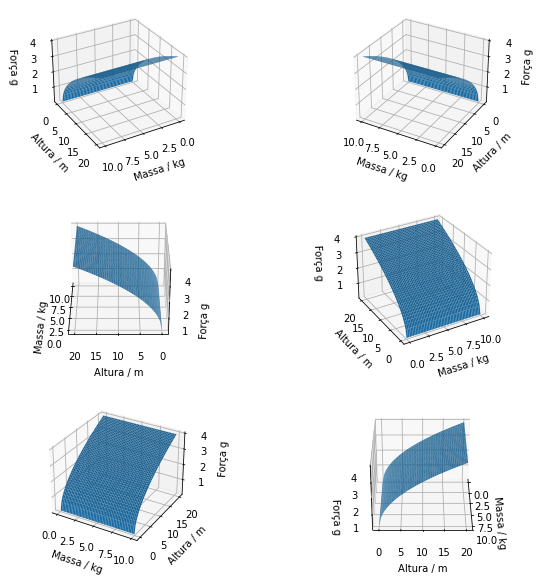

In [24]:
fig4, axarr4 = plt.subplots(nrows=3, ncols=2, facecolor=(1,1,1), 
                            figsize=(10, 10), subplot_kw={'projection': '3d'})

angle = np.arange(60, 361, 60)

for i, ax in enumerate(axarr4.flat):
    ax.plot_surface(Massa.magnitude, Altura.magnitude, Forca_g.magnitude)
    ax.set_xlabel("Massa" + " / " + f"{Massa.units:~P}")
    ax.set_ylabel("Altura" + " / " + f"{Altura.units:~P}")
    ax.set_zlabel("Força g")
    ax.view_init(30, angle[i])

plt.subplots_adjust(hspace=0.3)
plt.show()

Claro, figuras estáticas não são muito ilustrativas nesse caso. Seria melhor ter uma animação com a rotação do eixo. Vamos criar.

Para isso, importamos o módulo `animation` e criamos uma função que irá cuidar da nossa animação. Basicamente a função recebe um ângulo e aplica esse ângulo ao eixo ativo no momento usando `plt.gca()`, onde *gca* vem de *get current axis*.

In [25]:
from matplotlib import animation

In [26]:
def animate(angle, save_fig=False):    
    ax = plt.gca()  # gca = get current axis
    ax.view_init(30, angle)

Como todo esse artigo está sendo escrito em um Jupyter Notebook, para que a animação funcione precisamos do seguinte comando especial:

In [27]:
%matplotlib notebook

Agora vamos criar uma figura com sistema de eixos e passar a figura para o método `FuncAnimation` juntamente com a função criada para a animação.

<IPython.core.display.Javascript object>


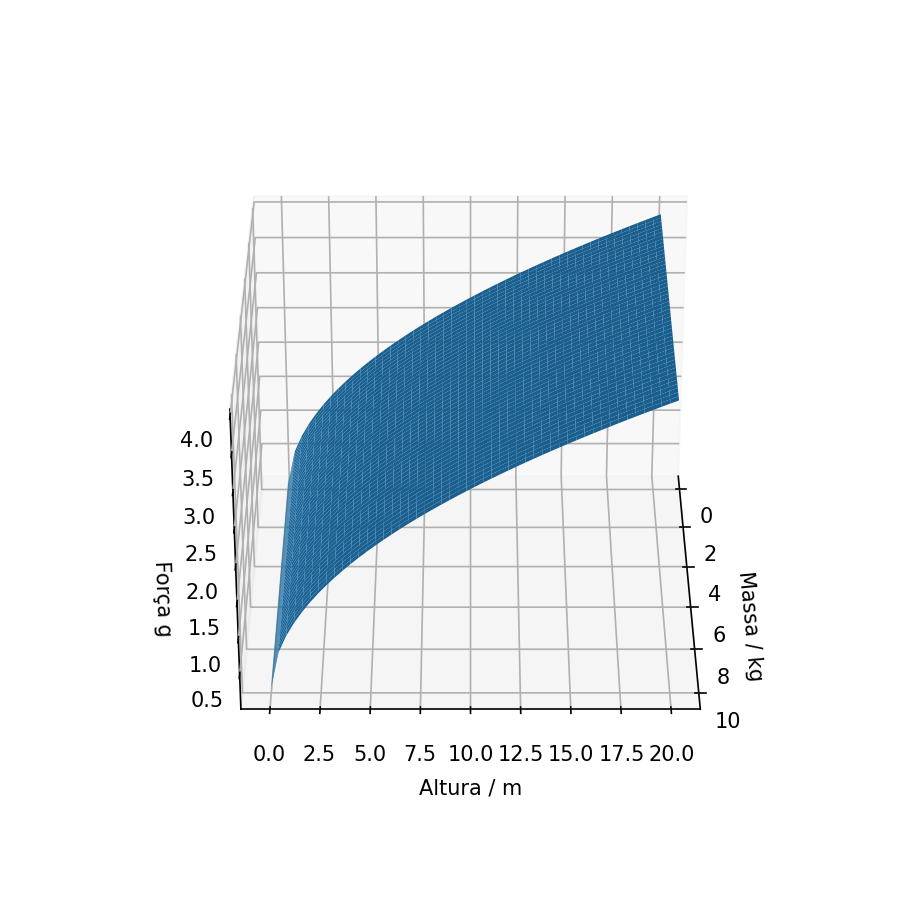

In [28]:
fig5, ax5 = plt.subplots(facecolor=(1,1,1), figsize=(6, 6), subplot_kw={'projection': '3d'})

ax5.plot_surface(Massa.magnitude, Altura.magnitude, Forca_g.magnitude)
ax5.set_xlabel("Massa" + " / " + f"{Massa.units:~P}")
ax5.set_ylabel("Altura" + " / " + f"{Altura.units:~P}")
ax5.set_zlabel("Força g")

anim = animation.FuncAnimation(fig5,
                               animate,                               
                               frames=361,    # rotação 360°                               
                               interval=10,   # intervalo entre os frames em milisegundos
                               repeat=False)  # se True, fica rodando indefinidamente, como um gif


plt.show()

Interessante! Agora, sabemos que a força g depende também do tempo de impacto. Para a figura acima, o valor está fixo no valor do enunciado. Vamos criar também um gráfico que mostre essa dependência. Primeiro, criando um conjunto de pontos em 3 dimensões e fazendo a conta da força g:

In [29]:
Massa, Altura, Tempo_impacto = np.meshgrid(massa, altura, tempo_impacto)

In [30]:
Forca_g = forca_g_impacto(Massa, Altura, Tempo_impacto)

Vamos visualizar o conjunto de pontos criados:

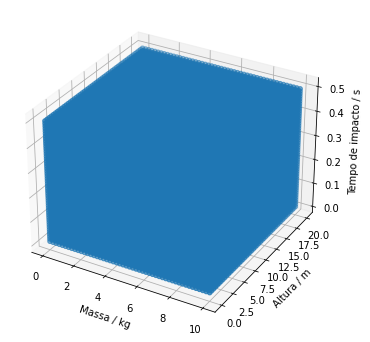

In [31]:
%matplotlib inline
fig6, ax6 = plt.subplots(facecolor=(1,1,1), figsize=(6, 6), subplot_kw={'projection': '3d'})

ax6.scatter(Massa.magnitude, Altura.magnitude, Tempo_impacto.magnitude)
ax6.set_xlabel("Massa" + " / " + f"{Massa.units:~P}")
ax6.set_ylabel("Altura" + " / " + f"{Altura.units:~P}")
ax6.set_zlabel("Tempo de impacto" + " / " + f"{Tempo_impacto.units:~P}")

plt.show()

Ok, não há informação útil alguma na figura acima pois os pontos possuem todos a mesma coloração. Não há como colocar mais um eixo em si, pois temos uma limitação visual de entendermos até 3D, mas há como colocar mais uma dimensão de informação fazendo com que a cor dos pontos tenha significado. Assim, teremos 3D visual mas 4D informacional.

Em um artigo recente já usei essa abordagem, veja como [nesse artigo onde estumos a atmosfera com Python](). Vou usar algumas ideias daquele artigo aqui, especialmente os módulos do Matplotlib para criar uma escala de cores e a ideia de normalização:

In [32]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

Os valores dos pontos serão normalizados com base em `Forca_g` e uma escala de valores será mostrada ao lado da projeção:

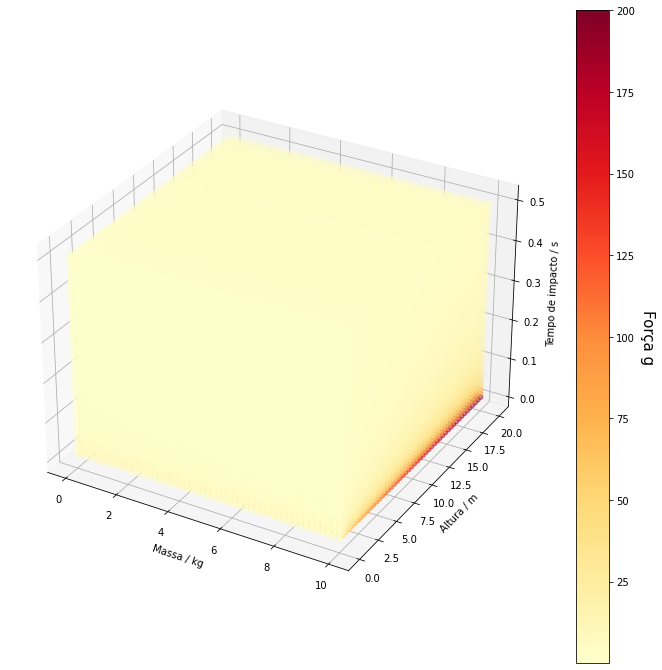

In [33]:
%matplotlib inline
fig7, ax7 = plt.subplots(facecolor=(1,1,1), figsize=(12, 12), subplot_kw={'projection': '3d'})

cores= Forca_g.magnitude
normaliza_cores = mcolors.Normalize(vmin=np.min(cores), vmax=np.max(cores))
colormap = cm.YlOrRd

img = ax7.scatter(Massa.magnitude, Altura.magnitude, Tempo_impacto.magnitude,
                  c=cores, cmap=colormap, norm=normaliza_cores)

scalarmappaple = cm.ScalarMappable(norm=normaliza_cores, cmap=colormap)
scalarmappaple.set_array(cores)
colorbar = fig7.colorbar(scalarmappaple)

ax7.set_xlabel("Massa" + " / " + f"{Massa.units:~P}")
ax7.set_ylabel("Altura" + " / " + f"{Altura.units:~P}")
ax7.set_zlabel("Tempo de impacto" + " / " + f"{Tempo_impacto.units:~P}")
colorbar.ax.set_ylabel('Força g', rotation=270, labelpad=20, size=15)

plt.show()

Ok, já temos um pouco mais de informação aqui. Percebemos que valores maiores de força g (cores vermelhas mais intensas) são obtidas para maiores massas e alturas e menores tempos de impacto. Coerente com nossa definição matemática, já que o tempo de impacto é o denominador no cálculo da força impulsiva de forma que menores valores de tempo de impacto resultam em maior força impulsiva e, consequentemente, maior força g.

Mas a distribuição de cores podia ser melhor, já que boa parte dos pontos ficou com coloração amarela clara. Podemos usar uma escala de cores logarítmica para dar maior contraste. Basta mudarmos `mcolors.Normalize`, que cria uma normalização escalar, para `mcolor.LogNorm`, que cria uma normalização em escala logarítmica. O restante do código permanece igual:

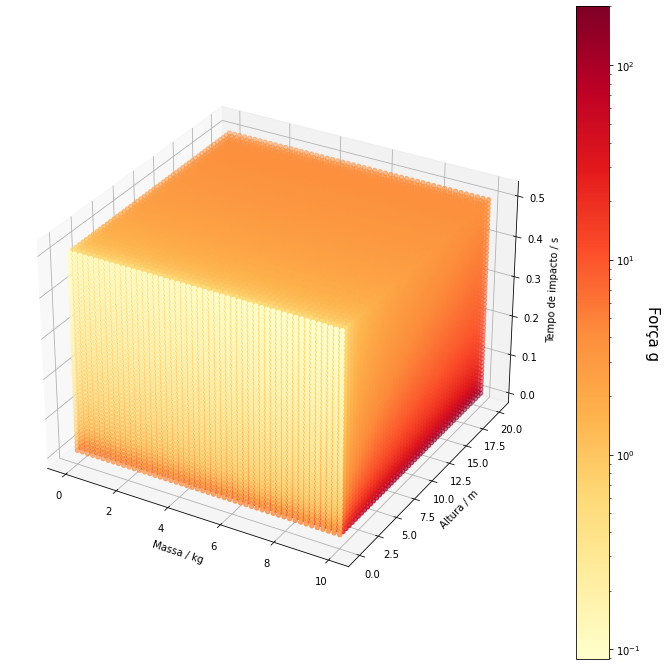

In [34]:
%matplotlib inline
fig8, ax8 = plt.subplots(facecolor=(1,1,1), figsize=(12, 12), subplot_kw={'projection': '3d'})

cores= Forca_g.magnitude
normaliza_cores = mcolors.LogNorm(vmin=np.min(cores), vmax=np.max(cores))
colormap = cm.YlOrRd

img = ax8.scatter(Massa.magnitude, Altura.magnitude, Tempo_impacto.magnitude,
                  c=cores, cmap=colormap, norm=normaliza_cores)

scalarmappaple = cm.ScalarMappable(norm=normaliza_cores, cmap=colormap)
scalarmappaple.set_array(cores)
colorbar = fig8.colorbar(scalarmappaple)

ax8.set_xlabel("Massa" + " / " + f"{Massa.units:~P}")
ax8.set_ylabel("Altura" + " / " + f"{Altura.units:~P}")
ax8.set_zlabel("Tempo de impacto" + " / " + f"{Tempo_impacto.units:~P}")
colorbar.ax.set_ylabel('Força g', rotation=270, labelpad=20, size=15)

plt.show()

Observe, vendo a face do cubo de pontos virada para você e paralela ao eixo de massa, que agora fica perceptível que mesmo quedas de alturas pequenas de objetos de baixa massa podem atingir valores de força g razoáveis desde que o tempo de impacto seja muito pequeno. Os pontos possuem uma coloração alaranjada mais intensa indicando forças g já próximas da ordem de 10 vezes a aceleração da gravidade. Claro que as cores vermelhas mais intensas ainda são para maiores alturas e massas e menores tempos de impacto.

Essa é uma dica importante: quando for necessário dar um maior contraste entre valores, experimente uma escala logarítmica.

Claro que agora você pode usar a ideia anterior e animar esse cubo, fazendo-o rodar. Apenas cuidado que há muitos pontos (consegue pensar em quantos? Deixe nos comentários), então pode ser lento. Fica de exercício. Futuramente talvez eu faça um post sobre como o Matplotlib é lento, mas pode ser otimizado.

Essa figura ajuda a explicitar um problema no enunciado da questão que já havia comentado no início do artigo. O trecho *(...) impacto pode durar até 0,5 s*. Perceba que a falta de precisão cria uma faixa de valores de força g que varia em 4 ordens de grandeza (10<sup>-1</sup> até 10<sup>2</sup>), a depender do tempo de impacto efetivo. Vamos discutir mais isso.

## Críticas ao enunciado

Em um [excelente artigo](https://www.if.ufrgs.br/novocref/?contact-pergunta=a-absurda-questao-do-tijolo-e-do-capacete-no-enem-2019) o Centro de Referência para o Ensino de Física (CREF) da UFRGS faz críticas contudentes ao enunciado desta questão. Como já destacamos no início do artigo, falta muitas informações no enunciado. Mas vamos focar no trecho referente ao tempo. 

Como 0,5 segundo é o máximo de tempo que o impacto pode durar, significa que há uma faixa grande de valores que a força resultante pode ter, conforme vimos na seção anterior. Assim, a resposta para a questão é **no mínimo** 2P. Logo, qualquer item *exceto a letra A*. Por que? Ora, sendo o tempo o denominador no cálculo da força impulsiva, qualquer valor menor que 0,5 segundo resultará em forças maiores. O gabarito escolheu o item que certamente é a resposta mais errada...

Além disso, com esses dados o tijolo certamente atravessaria o capacete! Vamos supor que durante o impacto a velocidade média relativa é cerca de 5 m/s. O tijolo iria penetrar 5 m/s **<sup>.</sup>** 0,5 s = 2,5 m no capacete. Não faz sentido isso. A colisão certamente tem que durar muito menos tempo para que a penetração seja da ordem de centímetros. Mas, como vimos, sendo menos tempo a força do impacto é bem maior.

## Conclusão

E aí? Aprendeu mais Python e/ou mais física? É uma pena que enunciados como esse apareçam no ENEM. E não há muito o que fazer já que é um exame centralizado e, direta ou indiretamente, forçado goela abaixo das instituições de ensino do país. Mas ao menos podemos usar esses deslizes para aprofundarmos mais nos nossos estudos e exercitar o senso crítico.

Divulgue esse artigo com estudantes e com quem mais quiser. Acompanhe o Ciência Programada nas redes sociais para saber quando mais artigos serão lançados. 

Até a próxima!